In [ ]:
from denseclus import DenseClus

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Reading in data

data = pd.read_csv('train.csv')

In [ ]:
data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# Add two categorical columns: wilderness type and soil types

wild = data.columns[11:15]
soil = data.columns[15:-1]

i=1
for x in wild:
  data[x] = data[x].apply(lambda x: x*i)
  i+=1

i=1
for x in soil:
  data[x] = data[x].apply(lambda x: x*i)
  i+=1

data['Wild'] = data[wild].sum(axis=1)
data['Soil'] = data[soil].sum(axis=1)

# Marks Wild and Soil as categorical variables for umap.
data = data.astype({'Wild': 'object'})
data = data.astype({'Soil': 'object'})

# dropping redundant soil1-40 and wild1-4 columns
data = data.drop(columns=soil)
data = data.drop(columns=wild)
data = data.drop(columns=['Id'])
# data.insert(0, "Type", data["Cover_Type"])
# data = data.astype({'Type': 'object'})
data1 = data.copy()
data = data.drop(columns=['Cover_Type'])

In [ ]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wild,Soil
0,2596,51,3,258,0,510,221,232,148,6279,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,3,4
15116,2603,121,19,633,195,618,249,221,91,1325,3,4
15117,2492,134,25,365,117,335,250,220,83,1187,3,4
15118,2487,167,28,218,101,242,229,237,119,932,3,4


In [ ]:
# Train-test split

data_train, data_test = train_test_split(data.copy(deep=True), test_size=0.1, random_state=314,
                                          stratify=data['Cover_Type'])

In [ ]:
# Initializing the model.

data_clf = DenseClus(random_state=314,
                     umap_combine_method='intersection_union_mapper')

In [ ]:
# Fitting the model. This takes awhile! 

data_clf.fit(data)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



In [ ]:
# Says that each data point is in cluster X. Cluster -1 is considered outliers.

data['cluster_id'] = data_clf.score()

In [ ]:
data1 = pd.read_csv('train.csv')
data['Type'] = data1['Cover_Type']
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wild,Soil,cluster_id,Type
0,2596,51,3,258,0,510,221,232,148,6279,1,29,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,29,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,12,3,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,30,1,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,29,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,3,4,3,3
15116,2603,121,19,633,195,618,249,221,91,1325,3,4,2,3
15117,2492,134,25,365,117,335,250,220,83,1187,3,4,1,3
15118,2487,167,28,218,101,242,229,237,119,932,3,4,3,3


In [ ]:
# Dictionary for our clusters

data_cluster_dict = {id: data[data['cluster_id']==id] for id in sorted(data['cluster_id'].unique())}

In [ ]:
# How many of each cover type are in each cluster?

for x in data_cluster_dict:
  print('Cluster=',x)
  print(data_cluster_dict[x]['Type'].value_counts())

Cluster= -1
6    27
7    27
3    24
2    22
5     8
1     8
4     4
Name: Type, dtype: int64
Cluster= 0
5    56
2    37
7    24
1     2
Name: Type, dtype: int64
Cluster= 1
5    646
2    121
3     64
1     56
6     20
4      8
7      6
Name: Type, dtype: int64
Cluster= 2
4    2131
3    1403
6    1320
2      40
5       2
1       2
Name: Type, dtype: int64
Cluster= 3
7    2086
1    2052
2    1893
5    1434
6     709
3     655
4       9
Name: Type, dtype: int64
Cluster= 4
1    36
2    31
6    16
7    14
5     4
Name: Type, dtype: int64
Cluster= 5
6    68
2    16
3    14
5    10
4     8
1     4
7     3
Name: Type, dtype: int64


In [ ]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

from IPython.display import Image
from matplotlib.pyplot import rcParams

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
  return f(*args, **kwds)


In [ ]:
# Initialize Matplotlib styling parameters
plt.style.use('seaborn')
rcParams.update({
    'font.size': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'legend.fontsize': 12

})

In [ ]:
# delete this later, just me checking the size of the embedding

data_umap_embedding = data_clf.numerical_umap_.embedding_
data_umap_embedding

array([[13.09287  ,  5.053131 ,  9.819513 ],
       [13.070674 ,  5.032691 ,  9.810346 ],
       [12.30489  ,  4.7207327,  9.363243 ],
       ...,
       [ 9.107431 ,  1.5643952,  7.9180074],
       [-0.6501417,  5.4528503,  7.2755976],
       [-0.6656627,  6.012257 ,  7.6477175]], dtype=float32)

In [ ]:
# Custom color sequence for clustering (helps assign outliers to grey color)
custom_color_seq = ['#777777']
custom_color_seq.extend(px.colors.qualitative.Plotly)

In [ ]:
# sometimes this seems to be better? (delete this later)

data_umap_embedding = data_clf.numerical_umap_.embedding_
data_umap_df = pd.DataFrame(data_umap_embedding, columns=['x','y','z'])
data_umap_df['cluster_id'] = data_clf.score()
data_groups = data_umap_df.groupby('cluster_id')

In [ ]:
# groupings, embeddings

data_umap_embedding = data_clf.mapper_.embedding_
data_umap_df = pd.DataFrame(data_umap_embedding, columns=['x','y','z'])
data_umap_df['cluster_id'] = data_clf.score()
data_groups = data_umap_df.groupby('cluster_id')

In [ ]:
#plots figure

fig = px.scatter_3d(
    data_umap_df.sort_values(by='cluster_id'),
    x='x',
    y='y',
    z='z',
    color=data['cluster_id'].sort_values().astype(object),
    color_discrete_sequence=custom_color_seq,
    title='Cover_Types UMAP Embedding')
fig.update_traces(
    marker = dict(size=3)
)
fig.update_layout(
    autosize=False,
    width=900,
    height=900,
    legend_title='cluster_id'
)
fig.layout.coloraxis.colorbar.title = 'dist_3'
fig.show()

In [ ]:
# image for github viewing

image_bytes = fig.to_image(format='png')
Image(image_bytes)

Text(0.5, 1.0, 'HDBSCAN Condensed Tree (Cover_Types)')

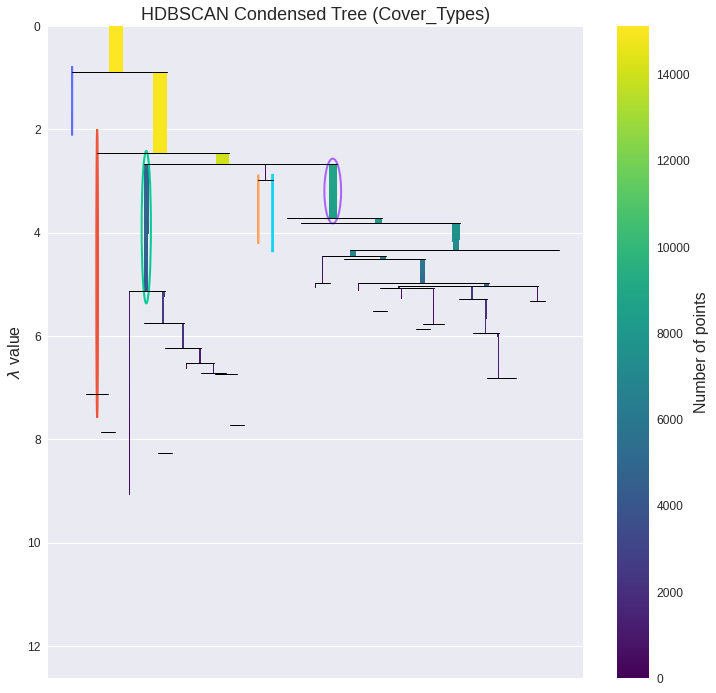

In [ ]:
# Another visualization of clusters

plt.figure(figsize=(12,12))

data_clf.hdbscan_.condensed_tree_.plot(select_clusters=True, selection_palette=custom_color_seq[1:])

plt.title('HDBSCAN Condensed Tree (Cover_Types)')

In [ ]:
data_umap_embedding = data_clf.mapper_.embedding_
data_umap_df = pd.DataFrame(data_umap_embedding, columns=['x','y'])
data_umap_df['cluster_id'] = data_clf.score()
data_groups = data_umap_df.groupby('cluster_id')

In [ ]:
fig = px.scatter(
    data_umap_df.sort_values(by='cluster_id'),
    x='x',
    y='y',
    color=data['cluster_id'].sort_values().astype(object),
    color_discrete_sequence=custom_color_seq,
    title='Cover_Types UMAP Embedding')
fig.update_traces(
    marker = dict(size=3)
)
fig.update_layout(
    autosize=False,
    width=900,
    height=900,
    legend_title='cluster_id'
)
fig.layout.coloraxis.colorbar.title = 'dist_3'
fig.show()